# Samples representation

## Imports 

In [1]:
from striplog import Component, Lexicon, Legend, Interval, Position, Decor
from core.omf import Borehole3D
from utils.lexicon.lexicon_fr import pollutant_memoris, lithology_memoris
import random
import pandas as pd

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


In [2]:
samples = [Component({'lithology': 'remblais', 'pollutant':'VR'}),
              Component({'lithology': 'limon', 'pollutant':'VI'}),
              Component({'lithology': 'schistes', 'pollutant':'VS'}),
              Component({'lithology': 'sable', 'pollutant':'VR'}),
              Component({'lithology': 'inconnu', 'pollutant':'VI'})
              ]

In [3]:
samples_intervals = [Interval(top=0, base=2, components=[samples[0]], data={'Naphtalène':50}),
                     Interval(top=2, base=3, components=[samples[1]]),
                     Interval(top=3, base=6, components=[samples[2]]),
                     Interval(top=6, base=8, components=[samples[3]]),
                     Interval(top=8, base=10, components=[samples[4]])]

In [4]:
bh3d = Borehole3D(name='BH_test', intervals=samples_intervals, legend=lithology_memoris, length=10, )

Borehole geometry created successfully !
Borehole geometry created successfully !


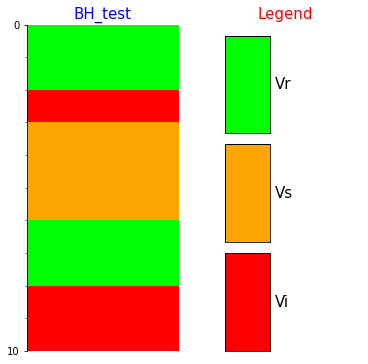

In [5]:
bh3d.plot2d(attribute='pollutant', legend=pollutant_memoris)

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'v". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passi

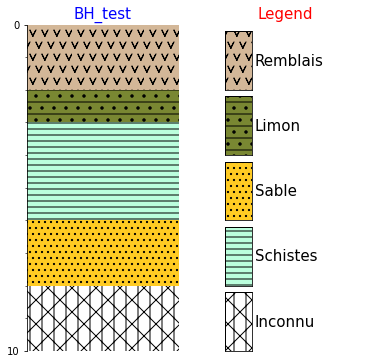

In [6]:
bh3d.plot2d(attribute='lithology', legend=lithology_memoris)

In [7]:
bh3d.plot3d(attribute='lithology')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [8]:
bh3d.legend

Legend(Decor({'_colour': '#d3b798', 'hatch': "'v'", 'component': Component({'lithology': 'remblais', 'pollutant': 'VR'}), 'width': 3.0})
Decor({'_colour': '#798732', 'hatch': "'-.'", 'component': Component({'lithology': 'limon', 'pollutant': 'VI'}), 'width': 3.0})
Decor({'_colour': '#bbffdd', 'hatch': "'--'", 'component': Component({'lithology': 'schistes', 'pollutant': 'VS'}), 'width': 3.0})
Decor({'_colour': '#ffcb23', 'hatch': "'..'", 'component': Component({'lithology': 'sable', 'pollutant': 'VR'}), 'width': 3.0})
Decor({'_colour': '#ffffff', 'hatch': '/|\\', 'component': Component({'lithology': 'inconnu', 'pollutant': 'VI'}), 'width': 3.0}))